## **Conociendo la librería de Surprise**
#### Publicación en Medium - Artículo

#### Estudiante: María José Mangas Gutiérrez
### **Sprint 3**     

In [ ]:
#!pip install --upgrade --force-reinstall numpy scipy


In [ ]:
#!pip install --upgrade --force-reinstall scikit-surprise


In [6]:
!pip install --upgrade pip setuptools wheel
!pip install numpy scipy matplotlib scikit-surprise

In [7]:
# Instalar Python 3.10 en Colab
# Se corre este codigo cuando da error x incompatibilidad de versiones de Python 3.10/3.11 con la versión de Surprise
!sudo apt-get install python3.10
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1
!sudo update-alternatives --config python3


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.10 is already the newest version (3.10.12-1~22.04.13).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.
There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                 Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.12   2         auto mode
  1            /usr/bin/python3.10   1         manual mode
  2            /usr/bin/python3.12   2         manual mode

Press <enter> to keep the current choice[*], or type selection number: ^C


In [9]:
#Se debe dar reiniciar sesión
!pip install numpy==1.26.4 scipy matplotlib scikit-surprise


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 9.0 MB/s  0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.2
    Uninstalling numpy-2.4.2:
      Successfully uninstalled numpy-2.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
pytensor 2.37.0 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
tobler 0.13.0 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.13.0.90 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
rasterio 1.5.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.13.0.90 requires numpy>=2; python_version >= "3

In [1]:
# Verificación de versiones
import numpy
import surprise

print("Versión de NumPy:", numpy.__version__)
print("Versión de Surprise:", surprise.__version__)


Versión de NumPy: 1.26.4
Versión de Surprise: 1.1.4


In [3]:
# Ejecución del modelo con Surprise
from surprise import Dataset, SVD
from surprise.model_selection import cross_validate

# Cargar dataset integrado MovieLens 100k
data = Dataset.load_builtin('ml-100k')

# Usar algoritmo SVD
algo = SVD()

# Validación cruzada con métricas
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

print("Resultados de validación cruzada:")
print(results)



Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9357  0.9324  0.9414  0.9353  0.9387  0.9367  0.0031  
MAE (testset)     0.7381  0.7367  0.7433  0.7390  0.7362  0.7386  0.0025  
Fit time          1.54    1.28    1.47    1.46    1.28    1.41    0.11    
Test time         0.32    0.09    0.22    0.09    0.14    0.17    0.09    
Resultados de validación cruzada:
{'test_rmse': array([0.93566331, 0.93244226, 0.94137434, 0.93526045, 0.93869528]), 'test_mae': array([0.73810435, 0.73667409, 0.74326718, 0.73897341, 0.73615347]), 'fit_time': (1.5444848537445068, 1.2793447971343994, 1.4655556678771973, 1.4558148384094238, 1.280609130859375), 'test_time': (0.319230556

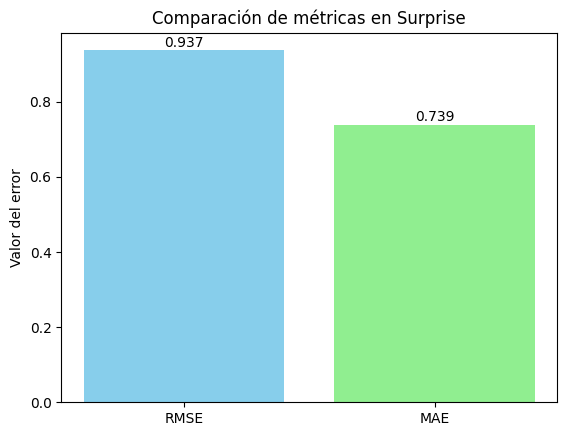

In [4]:
# Gráfico comparativo RMSE vs MAE
import matplotlib.pyplot as plt

# Extraer valores promedio de RMSE y MAE
rmse = results['test_rmse'].mean()
mae = results['test_mae'].mean()

# Crear gráfico de barras
metricas = ['RMSE', 'MAE']
valores = [rmse, mae]

plt.bar(metricas, valores, color=['skyblue', 'lightgreen'])
plt.title('Comparación de métricas en Surprise')
plt.ylabel('Valor del error')

# Mostrar valores encima de cada barra
for i, v in enumerate(valores):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')

plt.show()


**Flujo resumido**
- Cambiar a Python 3.10 (Celda 1).
- Reiniciar runtime.
- Instalar librerías (Celda 2).
- Verificar versiones (Celda 3).
- Ejecutar modelo (Celda 4).
- Graficar resultados (Celda 5)
